# Chapter 3: Probabilistic Iterated Function System (IFS) Algorithm

Chapter 3 of the book [PL] <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") written by <i>Jacek Kudrewicz</i> describes basic equations for IFS drawing from the cloud of points. Text covers IFS statistics and algorithms for development of IFS of different spatial density.

I want to honor authors of books, papers and code examples which are used by me during my learning. That's why every new notebook will start from the list of literature.

## Bibliography:

#### Base:
* <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") by <i>Jacek Kudrewicz</i>.

#### Additional:

* https://www.cut-the-knot.org/Curriculum/Geometry/SierpinskiGasketAddressing.shtml#addressing
* http://www.iquilezles.org/www/articles/ifsfractals/ifsfractals.htm
* How to optimally adjust the probabilities for the random IFS algorithm? - https://math.stackexchange.com/questions/1900337/how-to-optimally-adjust-the-probabilities-for-the-random-ifs-algorithm/1900379

## 3.1 Addresses of the attractor points

- https://www.cut-the-knot.org/Curriculum/Geometry/SierpinskiGasketAddressing.shtml#addressing
- http://www.iquilezles.org/www/articles/ifsfractals/ifsfractals.htm

### Example 3.1: IFS described by four functions:

$$\begin{equation}
w_{a}(z) = \lambda * z + i * (1 - \lambda) \\
w_{b}(z) = \lambda * z + (1 + i) * (1 - \lambda) \\
w_{c}(z) = \lambda * z \\
w_{d}(z) = \lambda * z + (1 - \lambda) \\
\end{equation}$$

where:

$$\begin{equation}
z = x + iy \\
\lambda < 0.5 \\
\end{equation}$$

In [94]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def run_example_31(start_point_x, start_point_y, lambda_value, number_of_iterations):
    if lambda_value >= 0.5:
        print('Lambda should be smaller than 0.5. Lambda set to 0.499')
        lambda_value == 0.499
    choices = ['wa', 'wb', 'wc', 'wd']
    z = complex(start_point_x, start_point_y)
    wz = []
    for i in range(0, number_of_iterations):
        choice = np.random.choice(choices)
        if choice == 'wa':
            new_z = lambda_value * z + 1j * (1 - lambda_value)
        elif choice == 'wb':
            new_z = lambda_value * z + (1 + 1j) * (1 - lambda_value)
        elif choice == 'wc':
            new_z = lambda_value * z
        else:
            new_z = lambda_value * z + (1 - lambda_value)
        wz.append([new_z.real, new_z.imag])
        z = new_z
    return np.asarray(wz)

In [3]:
points = run_example_31(0, 0, 0.32, 1000)

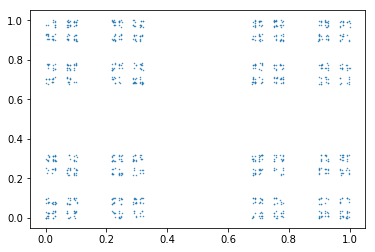

In [4]:
plt.figure()
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

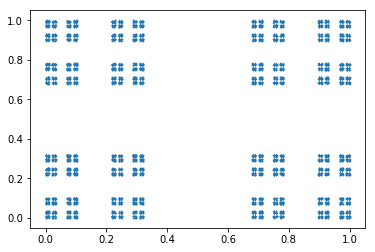

In [5]:
points = run_example_31(0, 0, 0.32, 10000)
plt.figure()
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

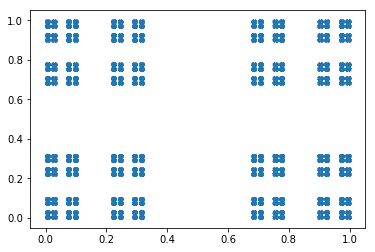

In [6]:
points = run_example_31(0, 0, 0.32, 100000)
plt.figure()
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

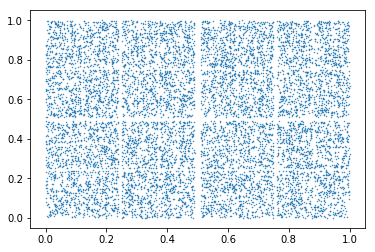

In [7]:
points = run_example_31(0, 0, 0.49, 10000)
plt.figure()
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

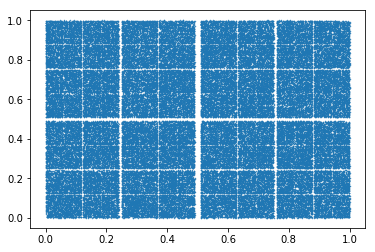

In [8]:
points = run_example_31(0, 0, 0.49, 100000)
plt.figure()
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

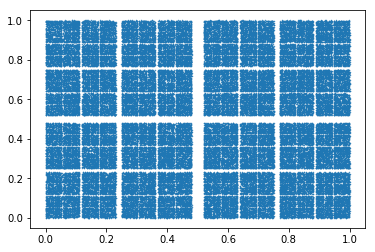

In [9]:
points = run_example_31(0, 0, 0.48, 100000)
plt.figure()
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

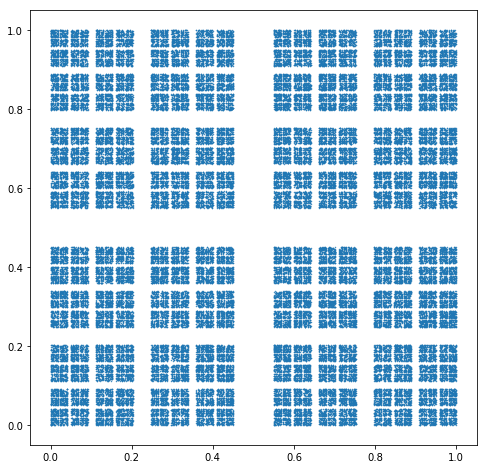

In [10]:
points = run_example_31(0, 0, 0.45, 100000)
plt.figure(figsize=(8,8))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

## 3.2 Random addresses

Each IFS is described by set of parameters $$ w_{0}, w_{1}, w_{2}, ..., w_{n} $$
In the previous steps probability that we choose some parameter was the same for each value. Actually we do not need to perform calculations in this way and different probabilities may be set to these parameters and in this case each parameter will have own probability of occurence:
$$ p_{0}, p_{1}, p_{2}, ..., p_{n} $$
$$\begin{equation}
\sum_{k=0}^n p_k = 1
\end{equation}$$

In the next example I'll use four parameters <i>w</i> and I'll assign to them different probabilites of being chosen to draw a point.

### Example 3.2: IFS described by four functions:

$$\begin{equation}
w_{a}(z) = \frac{z}{2} \\
w_{b}(z) = \frac{2z + 1 + i\sqrt{3}}{4} \\
w_{c}(z) = \frac{z + 1}{2} \\
w_{d}(z) = \frac{2z^* + 1 + i\sqrt{3}}{4} \\
\end{equation}$$

where:

$$\begin{equation}
z = x + iy \\
z^* = x - iy \\
\end{equation}$$

In [11]:
def run_example_32(probabilities, start_point_x=0.4, start_point_y=0.4):
    
    # Test probabilities
    if len(probabilities) < 4:
        raise TypeError('Set list with four probabilities as float numbers')
        
    sp = 0
    for p in probabilities:
        sp = sp + p
        
    if (1 - sp) > 0.00002:
        print('Sum of probabilities is:', sp)
        raise ValueError('Sum of probabilities should be 1')
        
    # Perform calculations
        
    choices = ['wa', 'wb', 'wc', 'wd']
    z = complex(start_point_x, start_point_y)
    wz = []
    for i in range(0, 100000):
        choice = np.random.choice(choices, p=probabilities)
        if choice == 'wa':
            new_z = z / 2
        elif choice == 'wb':
            new_z = (2 * z + 1 + 1j * np.sqrt(3)) / 4
        elif choice == 'wc':
            new_z = (z + 1) / 2
        else:
            new_z = (2 * z.conjugate() + 1 + 1j * np.sqrt(3)) / 4
        wz.append([new_z.real, new_z.imag])
        z = new_z
    return np.asarray(wz)

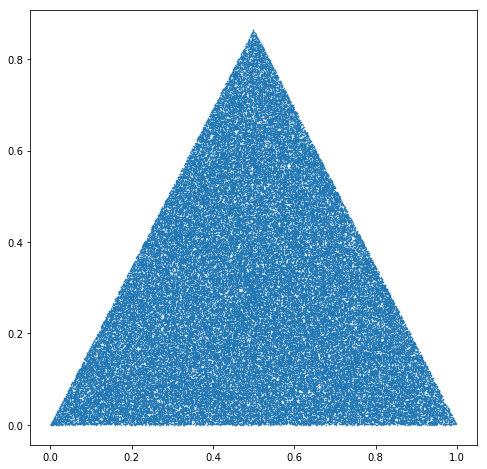

In [12]:
points = run_example_32([.25, .25, .25, .25])
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

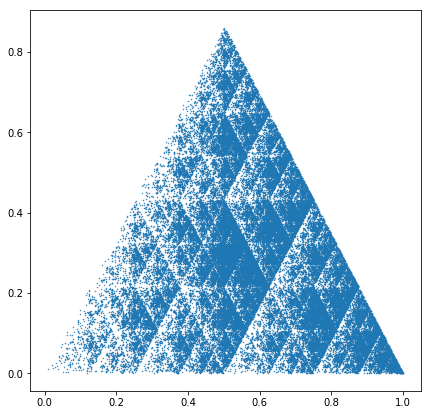

In [13]:
points = run_example_32([.1, .2, .3, .4])
plt.figure(figsize=(7, 7))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

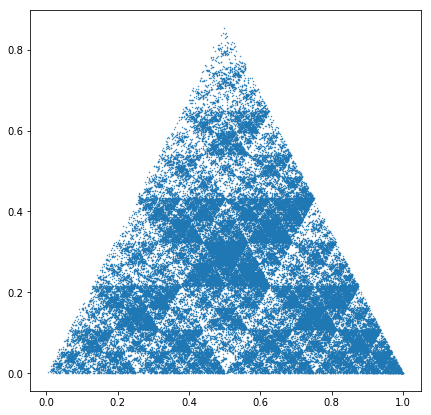

In [14]:
points = run_example_32([.2, .1, .3, .4])
plt.figure(figsize=(7, 7))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

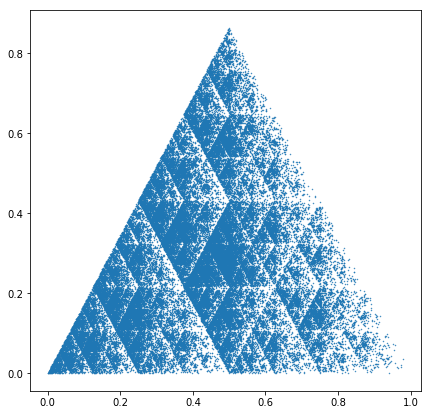

In [15]:
points = run_example_32([.3, .2, .1, .4])
plt.figure(figsize=(7, 7))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

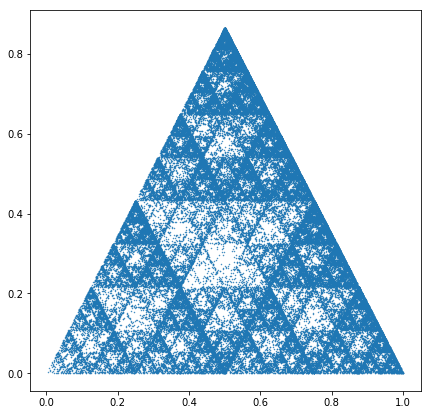

In [16]:
points = run_example_32([0.2, 0.4, 0.3, 0.1])
plt.figure(figsize=(7, 7))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

### Example 3.3: Own tests

$$\begin{equation}
w_{a}(z) = M(\theta) * \frac{z}{1.12} \\
w_{b}(z) = (\frac{2x + 1}{4}, y - \sqrt{3}) \\
\end{equation}$$

where:

$$\begin{equation}
z = (x, y) \\
\end{equation}$$

In [17]:
def test_33(probabilities, x_start, y_start, theta):
    z = np.asarray([[x_start, y_start]]).T
    th = np.radians(theta)
    sin_theta = np.sin(th)
    cos_theta = np.cos(th)
    M = np.matrix([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
    points_list = []
    
    for i in range(0, 60000):
        choices = np.random.choice(['w1', 'w2'], p=probabilities)
        if choices == 'w1':
            z = M * z / 1.12
            points_list.append(z)
        else:
            z[0] = (2 * z[0] + 1) / 3.8
            z[1] = z[1] - np.sqrt(3)
            points_list.append(z)
    return np.asarray(points_list)

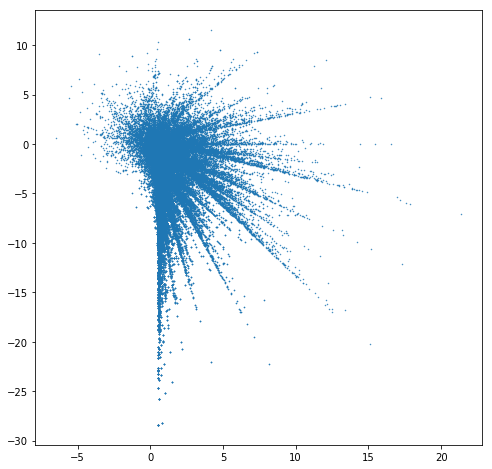

In [18]:
points = test_33([0.5, 0.5], 0.5, 0.5, 35)
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

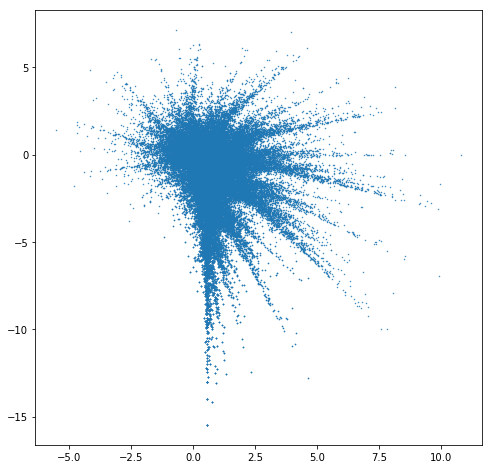

In [19]:
points = test_33([0.7, 0.3], 0.5, 0.5, 35)
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

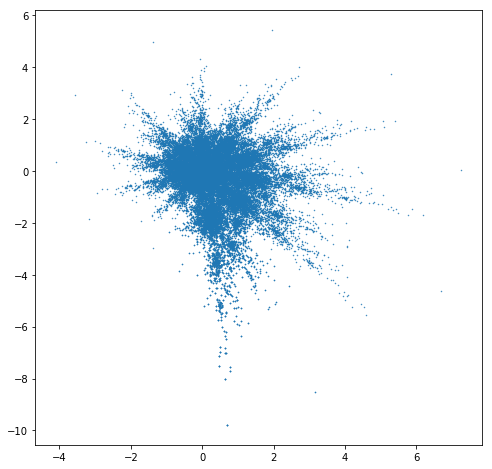

In [20]:
points = test_33([0.9, 0.1], 0.5, 0.5, 35)
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

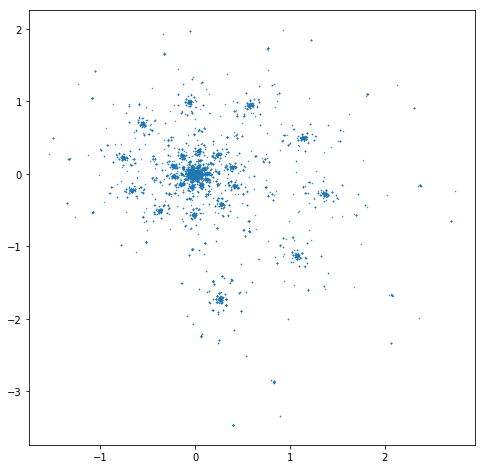

In [21]:
points = test_33([0.99, 0.01], 0.5, 0.5, 35)
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

## 3.3 Hutchinson metric

Hutchinson metric may be used as a measurement tool. Distance between two fractals may be measured based on it. Different name is the Wasserstein or Hutchinson metric. It has an interesting properties so in the different notebook I'll try to create simply algorithm for calculation of this metric over two vectors.

## 3.4 Markov operation and Elton–Odell theorem

The last part of this chapter is also theoretical and it is related to the atractor in IFS where each function describes this atractor (not probabilities!). But probabilities of these functions are needed to create visually appealing fractals. It can be seen in the example 3.3 but I've performed another calculations below with these functions and their probabilities:

$$\begin{equation}
w_{a}(z) = rot(\theta) * \frac{z}{0.13} \\
w_{b}(z) = -\frac{2z + 1}{4}\\
w_{c}(z) = z^\sqrt{2} \\
\end{equation}$$

where:

$$\begin{equation}
z = x + iy \\
\end{equation}$$

In [90]:
import copy

def test_34(probabilities, z, theta):
    th = np.radians(theta)
    isin_theta = np.sin(th) * 1j
    cos_theta = np.cos(th)
    points_list = []
    
    for i in range(0, 60000):
        choices = np.random.choice(['w1', 'w2', 'w3'], p=probabilities)
        if choices == 'w1':
            new_z = (cos_theta + isin_theta) * z / 5.13
        elif choices == 'w2':
            new_z = -(2 * z + 1) / 4
        else:
            new_z = z**(1/2)
        points_list.append([new_z.real, new_z.imag])
        z = copy.deepcopy(new_z)
    return np.asarray(points_list)

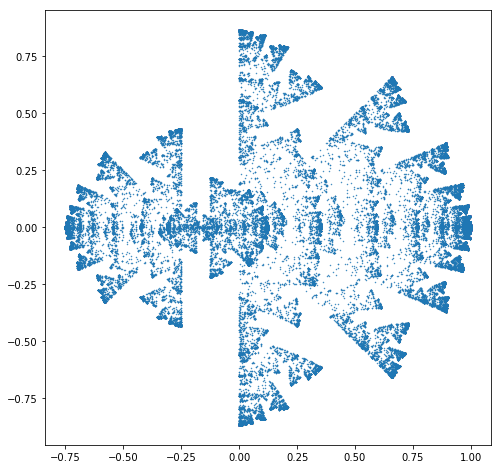

In [91]:
points = test_34([0.02, 0.3, 0.68], (0.1 + 0.1j), 14)
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

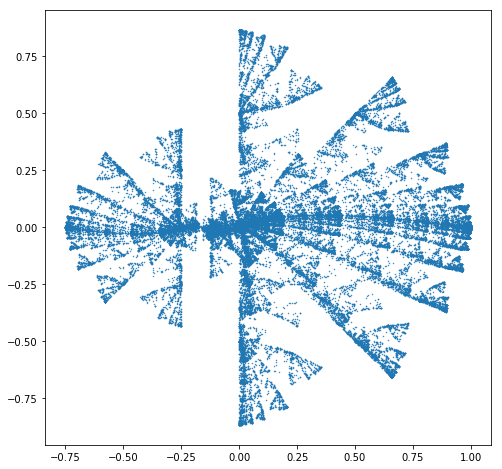

In [92]:
points = test_34([0.22, 0.22, 0.56], (0.1 + 0.1j), 14)
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

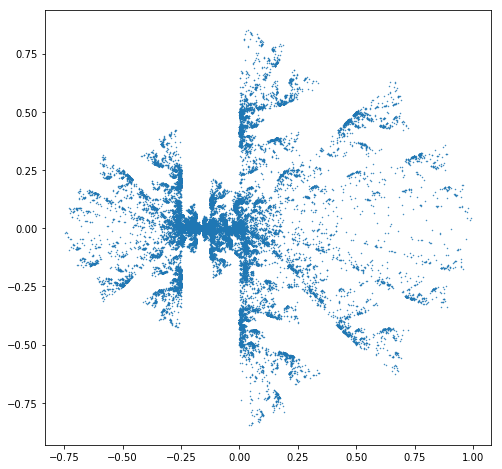

In [93]:
points = test_34([0.22, 0.56, 0.22], (0.1 + 0.1j), 14)
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], s=0.2)
plt.show()

#### Summary:

In this chapter I've learned about Probabilistic Iterated Function Systems and the Hutchinson metric.

* Hutchinson distance could be used as a metric of distance between probability distributions in some set (in my case it is a set R^2 or simply digital image canvas). Theory behind it is complicated but this metric is very interesting and in the future I'll explore this topic further.
* I've tried to generate "my own" fractals. It was method of trials and errors with setting of probabilities (most of a time) and equations. The very good example of setting up own fractal is presened in the discussion at Math StackExchenge: https://math.stackexchange.com/questions/1900337/how-to-optimally-adjust-the-probabilities-for-the-random-ifs-algorithm/1900379

> The next chapter (4) will be covered in the new notebook. And it covers storing and processing of the fractals.

-----

<i>Things to correct in this notebook</i>:
- Actually nothing :) But Hutchinson distance algorithm should be created. And for me development of a new fractals from probabilistic IFS is some "kind of magic". Equations are ok (translation, rotation, contraction etc.) but I still don't understand how to choose proper probabilities. I'll explore it in the second iteration throughout the book material.